# The Battle of the Neighborhoods - Week 2

## 4. Downloading and Exploring Farmers Market dataset

### Download all the dependencies needed

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geocoder==1.5.0 # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!pip install seaborn==0.10.1 
import seaborn as sns

!pip install folium==0.5.0  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 225kB 8.2MB/s eta 0:00:01
  Found existing installation: seaborn 0.9.0
    Uninstalling seaborn-0.9.0:
      Successfully uninstalled seaborn-0.9.0
Libraries imported.


The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [5]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c7e3575de19f43f08285faec1ab7127a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZNf-ALPSQPk2P_oLLQuc-lsjMITLb9E9JAJtZcsGBdQI',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_c7e3575de19f43f08285faec1ab7127a.get_object(Bucket='finalprojectcapstone-donotdelete-pr-c46iju8thx9lzw',Key='DOHMH_Farmers_Markets.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

FM_NYC = pd.read_csv(body)
FM_NYC.head()


,Borough,Market Name,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Woodhull Hospital Youthmarket,Broadway & Flushing Ave,40.700726,-73.941932,Wednesday,9 a.m. - 2 p.m.,07/10/2019-11/27/2019,Yes,No,No,No,"(40.700726, -73.941932)"
1,Manhattan,Mount Sinai Hospital Greenmarket,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
3,Manhattan,Greenmarket at Oculus Plaza,"Church & Fulton Sts, on Oculus Plaza",40.711535,-74.010464,Tuesday,7 a.m. - 7 p.m.,07/09/2019-11/30/19,Yes,Yes,No,No,"(40.711535, -74.010464)"
4,Queens,Ditmars Park Youthmarket,"Steinway St bet Ditmars Blvd & 23rd Ave, at Di...",40.772854,-73.906061,Saturday,8 a.m. - 3 p.m.,07/13/2019-11/23/2019,Yes,No,No,No,"(40.772854, -73.906061)"


Website-https://www.grownyc.org/greenmarketco/foodbox
GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.

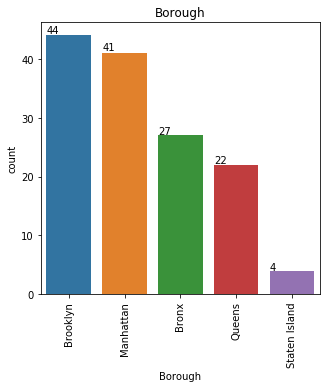

In [7]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Manhattan amd Brooklyn has highest numbers of Farmers Markets

Use geopy library to get the latitude and longitude values of New York City.
The geograpical coordinate of New York City are 40.7127281, -74.0060152

In [8]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with Facility name and Borough of Farmers Market superimposed on top.

In [9]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, FacilityName, borough in zip(FM_NYC['Latitude'], FM_NYC['Longitude'], FM_NYC['Market Name'], FM_NYC['Borough']):
            label = '{}, {}'.format(FacilityName, borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='green',
                fill=True,
                fill_color='green',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets

# The Battle of the Neighborhoods - Week 2 - Boroughs of New York City
## 5A. Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan
### Introduction
In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Brooklyn and Manhattan. We will use the explore function to get the most common venue categories in each neighborhood, and then use this feature to group the neighborhoods into clusters. We will use the k-means clustering algorithm to complete this task. Finally, we will use the Folium library to visualize the neighborhoods in Brooklyn and Manhattan and their emerging clusters.

Table of Contents
1. Download and Explore Dataset
2. Explore Neighborhoods in Brooklyn and Manhattan
3. Analyze Each Neighborhood
4. Cluster Neighborhoods and Examine Clusters

Download all the dependencies that are needed.

In [10]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geocoder==1.5.0 # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

!pip install folium==0.5.0  # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## 1. Download and Explore Dataset

Neighborhood has a total of 5 boroughs and 306 neighborhoods. In order to segement the neighborhoods and explore them, we will essentially need a dataset that contains the 5 boroughs and the neighborhoods that exist in each borough as well as the latitude and logitude coordinates of each neighborhood.

Load and explore the data

In [12]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
print('Data downloaded!')

Data downloaded!


In [13]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [14]:
neighborhoods_data = newyork_data['features']

In [15]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [16]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [17]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [18]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)


In [19]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [20]:
neighborhoods.to_csv('BON1_NYC_GEO.csv',index=False)

In [21]:
NYC_Geo=pd.read_csv('BON1_NYC_GEO.csv')
print('Data downloaded!')

Data downloaded!


In [22]:
NYC_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [23]:
NYC_Geo['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40


In [24]:
NYC_Geo.shape

(306, 4)

In [25]:
print(NYC_Geo.Borough.unique())

['Bronx' 'Manhattan' 'Brooklyn' 'Queens' 'Staten Island']


In [26]:
NYC_Geo.isnull().sum()

Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

## Segmenting and Clustering Neighborhoods - Brooklyn and Manhattan

In [27]:
BM_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Brooklyn')|(NYC_Geo['Borough'] == 'Manhattan')]
BM_Geo = BM_Geo.reset_index(drop=True)
BM_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Brooklyn,Bay Ridge,40.625801,-74.030621
2,Brooklyn,Bensonhurst,40.611009,-73.995180
3,Brooklyn,Sunset Park,40.645103,-74.010316
4,Brooklyn,Greenpoint,40.730201,-73.954241


In [28]:
BM_Geo.shape

(110, 4)

### Use geopy library to get the latitude and longitude values of New York City. The geograpical coordinate of New York City are 40.7127281, -74.0060152.

In [30]:
import time
start_time = time.time()

address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

print("--- %s seconds ---" % round((time.time() - start_time), 2))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.
--- 0.58 seconds ---


#### Create a map of Brooklyn and Manhattan with neighborhoods superimposed on top.

In [31]:
# create map of Toronto using latitude and longitude values
map_BM = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BM_Geo['Latitude'], BM_Geo['Longitude'], BM_Geo['Borough'], BM_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BM)  
    
map_BM

#### Define Foursquare Credentials and Version

In [32]:
CLIENT_ID = 'VG3EF34HH43W2Z0CPA44DR54VOJY1KIHOOJ5GJDSSLDHEDSL' # your Foursquare ID
CLIENT_SECRET = 'RWPVLBSMBBRAWXJWP3GQ2HYTYKK4BHRHDZTFIORCWN2HFSVD' # your Foursquare Secret
VERSION = '20200428' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VG3EF34HH43W2Z0CPA44DR54VOJY1KIHOOJ5GJDSSLDHEDSL
CLIENT_SECRET:RWPVLBSMBBRAWXJWP3GQ2HYTYKK4BHRHDZTFIORCWN2HFSVD


## 2. Explore Neighborhoods in Brooklyn and Manhattan
### Extract Venues data for each neighborhoods in Brooklyn

In [33]:
def getNearbyVenues(names, latitudes, longitudes, LIMIT=200, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the above function on each neighborhood and create a new dataframe called BM_venues.

In [34]:
BM_venues = getNearbyVenues(names=BM_Geo['Neighborhood'],
                                  latitudes=BM_Geo['Latitude'],
                                  longitudes=BM_Geo['Longitude'],
                                  LIMIT=200)

print('The "BM_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BM_venues['Venue Category']),
      len(BM_venues['Venue Category'].unique())))

BM_venues.to_csv('BM_venues.csv', sep=',', encoding='UTF8')
BM_venues.head()

Marble Hill
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


#### Download data from BM_venues.csv

In [35]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BM_venues = pd.read_csv('BM_venues.csv', skiprows=1, names=colnames)
BM_venues.columns = BM_venues.columns.str.replace(' ', '')
BM_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Sam's Pizza,40.879435,-73.905859,Pizza Place
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [36]:
BM_venues.shape

(9672, 7)

#### Visualize the BM_Venues data

In [38]:
def Venues_Map(Borough_name, Borough_neighborhoods):
    
    # Use geopy library to get the latitude and longitude values 
    geolocator = Nominatim(user_agent="Jupyter")
    Borough_location = geolocator.geocode(Borough_name) #'Brooklyn, NY'
    Borough_latitude = Borough_location.latitude
    Borough_longitude = Borough_location.longitude
    print('The geographical coordinates of "{}" are {}, {}.'.format(Borough_name, Borough_latitude, Borough_longitude))
    
    # To verify the number of Boroughs and Neighborhoods in the extracted data
    print('The "{}" dataframe has {} different venue types and {} neighborhoods.'.format(
          Borough_name,
          len(Borough_neighborhoods['VenueCategory'].unique()),
          len(Borough_neighborhoods['Neighborhood'].unique())))
    
    # create map of city using latitude and longitude values
    map_Borough = folium.Map(location=[Borough_latitude, Borough_longitude], zoom_start=10)

    # add markers to map
    for lat, lng, venue, category in zip(Borough_neighborhoods['VenueLatitude'], Borough_neighborhoods['VenueLongitude'], Borough_neighborhoods['Venue'], Borough_neighborhoods['VenueCategory']):
        label = '{}, {}'.format(category, venue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=0.1,
            popup=label,
            color='red',
            fill=True,
            fill_color='#FF0000',
            fill_opacity=0.3).add_to(map_Borough)  
         
        return map_Borough

In [39]:
Venues_Map('New York City, NY', BM_venues)

The geographical coordinates of "New York City, NY" are 40.7127281, -74.0060152.
The "New York City, NY" dataframe has 409 different venue types and 110 neighborhoods.


In [40]:
BM_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 392
Coffee Shop                                 349
Park                                        245
Italian Restaurant                          232
Bakery                                      229
Bar                                         218
Café                                        217
Grocery Store                               200
American Restaurant                         167
Mexican Restaurant                          155
Gym                                         151
Deli / Bodega                               150
Chinese Restaurant                          146
Sandwich Place                              142
Ice Cream Shop                              139
Caribbean Restaurant                        137
Cocktail Bar                                134
Gym / Fitness Center                        132
Wine Shop                                   129
Donut Shop                                  116
Bagel Shop                

#### Check how many venues were returned for each neighborhood

In [41]:
BM_venues.groupby('Neighborhood').count()

,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Bath Beach,95,95,95,95,95,95
Battery Park City,100,100,100,100,100,100
Bay Ridge,100,100,100,100,100,100
Bedford Stuyvesant,100,100,100,100,100,100
Bensonhurst,100,100,100,100,100,100
Bergen Beach,10,10,10,10,10,10
Boerum Hill,100,100,100,100,100,100
Borough Park,53,53,53,53,53,53
Brighton Beach,92,92,92,92,92,92


#### Find out how many unique categories can be curated from all the returned venues

In [42]:
print('There are {} uniques categories.'.format(len(BM_venues['VenueCategory'].unique())))

There are 409 uniques categories.


## 3. Analyze Each Neighborhood

In [43]:
# one hot encoding
BM_onehot = pd.get_dummies(BM_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BM_onehot.columns)

# add neighborhood column back to dataframe
BM_onehot['Neighborhood'] = BM_venues['Neighborhood'] 

# move neighborhood column to the first column
BM_onehot = BM_onehot[column_names]

BM_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Bay,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cruise,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Film Studio,Financial or Legal Service,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Kofte Place,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lighthouse,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Outlet Store,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restau

#### To filter only Restaurant data

In [44]:
restaurant_List = []
search = 'Restaurant'
for i in BM_onehot.columns :
    if search in i:
        restaurant_List.append(i)

In [45]:
restaurant_List

['African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Austrian Restaurant',
 'Burmese Restaurant',
 'Cajun / Creole Restaurant',
 'Cambodian Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Caucasian Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Empanada Restaurant',
 'English Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Israeli Restaurant',
 'Italian Restaurant',
 'Japanese Curry Restaurant',
 'Japanese Restaurant',
 'Jewish Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',
 'Latin American Res

In [46]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List
BM_restaurant = BM_onehot[col_name]
BM_restaurant = BM_restaurant.iloc[:,1::]

In [47]:
BM_restaurant_grouped = BM_restaurant.groupby('Neighborhood').sum().reset_index()

In [48]:
BM_restaurant_grouped['Total'] = BM_restaurant_grouped .sum(axis=1)

## 4. Cluster Neighborhoods and Examine Clusters
#### First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method

#### From sklearn documentation - https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

A higher Silhouette Coefficient score relates to a model with better-defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores: `

a: The mean distance between a sample and all other points in the same class.

b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient is for a single sample is then given as:

s=b-a/max(a,b)

Now, to find the optimal value of k for KMeans, loop through 1..n for n_clusters in KMeans and calculate Silhouette Coefficient for each sample.

A higher Silhouette Coefficient indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [49]:
BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BM_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BM_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.386852105432268
For n_clusters=3, The Silhouette Coefficient is 0.29540657113844704
For n_clusters=4, The Silhouette Coefficient is 0.22221265402391818
For n_clusters=5, The Silhouette Coefficient is 0.20611997503646323
For n_clusters=6, The Silhouette Coefficient is 0.19604402409850663
For n_clusters=7, The Silhouette Coefficient is 0.18456870081629775
For n_clusters=8, The Silhouette Coefficient is 0.17446712303777467
For n_clusters=9, The Silhouette Coefficient is 0.16223659561561932


#### As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
#### For n_clusters=2, The Silhouette Coefficient is 0.386852105432268

#### Run k-means to cluster the neighborhood into 2 clusters.

In [50]:
# set number of clusters
kclusters = 2

BM_grouped_clustering = BM_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int32)

In [51]:
BM_results = pd.DataFrame(kmeans.cluster_centers_)
BM_results.columns = BM_grouped_clustering.columns
BM_results.index = ['cluster0','cluster1']
BM_results['Total Sum'] = BM_results.sum(axis = 1)
BM_results

,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,Burmese Restaurant,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hotpot Restaurant,Indian Restaurant,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.111111,1.714286,0.126984,0.079365,0.428571,0.142857,0.079365,3.174603e-02,0.079365,0.047619,0.095238,1.333333,0.063492,1.555556,5.204170e-18,1.111111e-01,0.222222,3.174603e-02,7.936508e-02,0.126984,0.206349,1.269841e-01,0.047619,0.111111,0.206349,0.428571,0.095238,0.587302,0.063492,0.460317,0.126984,7.936508e-02,7.936508e-02,0.777778,0.047619,2.857143,0.015873,1.285714,7.936508e-02,0.349206,0.047619,0.698413,0.095238,0.047619,0.603175,2.031746,0.476190,0.015873,0.047619,0.650794,1.587302e-02,1.587302e-02,3.174603e-02,0.206349,3.174603e-02,0.222222,0.777778,0.269841,3.174603e-02,0.984127,1.587302e-02,0.063492,0.047619,0.396825,0.460317,1.301587,3.174603e-02,0.047619,0.015873,0.380952,0.968254,5.204170e-18,0.047619,0.285714,0.047619,1.587302e-02,0.619048,1.587302e-02,0.476190,27.031746,54.063492
cluster1,0.021277,1.255319,0.021277,0.042553,0.106383,0.021277,0.021277,-3.469447e-18,0.021277,0.000000,0.000000,1.127660,0.021277,1.021277,2.127660e-02,2.775558e-17,0.085106,-3.469447e-18,2.081668e-17,0.021277,0.042553,-1.387779e-17,0.000000,0.021277,0.191489,0.936170,0.000000,0.340426,0.042553,0.063830,0.021277,2.081668e-17,2.081668e-17,0.191489,0.000000,1.106383,0.042553,0.553191,2.081668e-17,0.042553,0.000000,0.361702,0.000000,0.000000,0.340426,0.574468,0.212766,0.021277,0.021277,0.234043,-1.734723e-18,-1.734723e-18,-3.469447e-18,0.127660,-3.469447e-18,0.042553,0.297872,0.085106,-3.469447e-18,0.617021,-1.734723e-18,0.021277,0.085106,0.127660,0.170213,0.574468,-3.469447e-18,0.021277,0.021277,0.085106,0.212766,2.127660e-02,0.000000,0.042553,0.000000,-1.734723e-18,0.212766,-1.734723e-18,0.085106,12.021277,24.042553


The Total and Total Sum of cluster0 has smallest value. It shows that the market is not saturated.

#### Dataframe with Neighborhood,Cluster No and Total Sum

In [52]:
BM_results_merged = pd.DataFrame(BM_restaurant_grouped['Neighborhood'])

BM_results_merged['Total'] = BM_restaurant_grouped['Total']
BM_results_merged = BM_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [53]:
print(BM_results_merged.shape)
BM_results_merged

(110, 3)


,Neighborhood,Total,Cluster_Labels
0,Bath Beach,31,0
1,Battery Park City,11,1
2,Bay Ridge,36,0
3,Bedford Stuyvesant,20,0
4,Bensonhurst,30,0
5,Bergen Beach,4,1
6,Boerum Hill,17,1
7,Borough Park,4,1
8,Brighton Beach,20,0
9,Broadway Junction,9,1


#### Merge BM_results_merged with BM_Geo

In [54]:
BM_merged = BM_Geo

BM_merged = BM_merged.join(BM_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BM_merged.shape)
BM_merged.head(10) # check the last columns!

(110, 6)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,14,1
1,Brooklyn,Bay Ridge,40.625801,-74.030621,36,0
2,Brooklyn,Bensonhurst,40.611009,-73.995180,30,0
3,Brooklyn,Sunset Park,40.645103,-74.010316,39,0
4,Brooklyn,Greenpoint,40.730201,-73.954241,21,0
5,Brooklyn,Gravesend,40.595260,-73.973471,9,1
6,Brooklyn,Brighton Beach,40.576825,-73.965094,20,0
7,Brooklyn,Sheepshead Bay,40.586890,-73.943186,31,0
8,Brooklyn,Manhattan Terrace,40.614433,-73.957438,17,1
9,Brooklyn,Flatbush,40.636326,-73.958401,33,0


#### Finally, let's visualize the resulting clusters

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BM_merged['Latitude'], BM_merged['Longitude'], BM_merged['Neighborhood'], BM_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## List Neighborhoods of Interest in New York City
## Cluster 1 : Saturated Markets

In [56]:
BM_merged[BM_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,14,1
1,Brooklyn,Gravesend,40.595260,-73.973471,9,1
2,Brooklyn,Manhattan Terrace,40.614433,-73.957438,17,1
3,Brooklyn,East Flatbush,40.641718,-73.936103,6,1
4,Brooklyn,Windsor Terrace,40.656946,-73.980073,17,1
5,Brooklyn,Brownsville,40.663950,-73.910235,7,1
6,Brooklyn,Carroll Gardens,40.680540,-73.994654,18,1
7,Brooklyn,Red Hook,40.676253,-74.012759,10,1
8,Brooklyn,Park Slope,40.672321,-73.977050,18,1
9,Brooklyn,Cypress Hills,40.682391,-73.876616,13,1


## Cluster 0 : Untapped Markets

In [57]:
BM_merged[BM_merged['Total'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels


#### There are no Untapped Markets for Restaurant business in Brooklyn and Manhattan.

## 5B Segmenting and Clustering Neighborhoods - Bronx, Queens and Staten Island
## Introduction
In this section of the capstone project, we will use the Foursquare API to explore neighborhoods in Bronx, Queens and Staten Island.

## Table of Contents
1. Download and Explore Dataset
2. Explore Neighborhoods in Bronx, Queens and Staten Island
3. Analyze Each Neighborhood
4. Cluster Neighborhoods and Examine Clusters

### 1. Download and Explore Dataset

In [58]:
BQS_Geo = NYC_Geo.loc[(NYC_Geo['Borough'] == 'Bronx')|(NYC_Geo['Borough'] == 'Queens')|(NYC_Geo['Borough'] == 'Staten Island')]
BQS_Geo = BQS_Geo.reset_index(drop=True)
BQS_Geo.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [59]:
BQS_Geo.shape

(196, 4)

#### Create a map of Bronx, Queens and Staten Island with neighborhoods superimposed on top.

In [60]:
# create map of Toronto using latitude and longitude values
map_BQS = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(BQS_Geo['Latitude'], BQS_Geo['Longitude'], BQS_Geo['Borough'], BQS_Geo['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_BQS)  
    
map_BQS

## 2. Explore Neighborhoods in Bronx, Queens and Staten Island¶
#### Run the above function on each neighborhood and create a new dataframe called BQS_venues.

In [61]:
BQS_venues = getNearbyVenues(names=BQS_Geo['Neighborhood'],
                                  latitudes=BQS_Geo['Latitude'],
                                  longitudes=BQS_Geo['Longitude'],
                                  LIMIT=200)

print('The "BQS_venues" dataframe has {} venues and {} unique venue types.'.format(
      len(BQS_venues['Venue Category']),
      len(BQS_venues['Venue Category'].unique())))

BQS_venues.to_csv('BQS_venues.csv', sep=',', encoding='UTF8')
BQS_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cam

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant


#### Download data from Brooklyn_venues.csv

In [63]:
colnames = ['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
BQS_venues = pd.read_csv('BQS_venues.csv', skiprows=1, names=colnames)
BQS_venues.columns = BQS_venues.columns.str.replace(' ', '')
BQS_venues.head()

,Neighborhood,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant


#### Visualize the BQS_Venues data

In [64]:
Venues_Map('New York City, NY', BQS_venues)

The geographical coordinates of "New York City, NY" are 40.7127281, -74.0060152.
The "New York City, NY" dataframe has 390 different venue types and 194 neighborhoods.


In [65]:
BQS_venues.groupby('VenueCategory')['Venue'].count().sort_values(ascending=False)

VenueCategory
Pizza Place                                 631
Deli / Bodega                               353
Donut Shop                                  347
Italian Restaurant                          289
Pharmacy                                    277
Sandwich Place                              276
Chinese Restaurant                          263
Bank                                        238
Grocery Store                               216
Bakery                                      214
Park                                        211
Fast Food Restaurant                        208
Coffee Shop                                 205
Bar                                         202
Ice Cream Shop                              186
Mexican Restaurant                          176
Supermarket                                 170
Diner                                       166
Bus Stop                                    150
Bagel Shop                                  131
American Restaurant       

#### Let's check how many venues were returned for each neighborhood

In [66]:
BQS_venues.groupby('Neighborhood').count()

,NeighborhoodLatitude,NeighborhoodLongitude,Venue,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Allerton,67,67,67,67,67,67
Annadale,16,16,16,16,16,16
Arden Heights,24,24,24,24,24,24
Arlington,21,21,21,21,21,21
Arrochar,24,24,24,24,24,24
Arverne,34,34,34,34,34,34
Astoria,100,100,100,100,100,100
Astoria Heights,77,77,77,77,77,77
Auburndale,100,100,100,100,100,100


#### Let's find out how many unique categories can be curated from all the returned venues

In [67]:
print('There are {} uniques categories.'.format(len(BQS_venues['VenueCategory'].unique())))

There are 390 uniques categories.


## 3. Analyze Each Neighborhood

In [68]:
# one hot encoding
BQS_onehot = pd.get_dummies(BQS_venues[['VenueCategory']], prefix="", prefix_sep="")

#column lists before adding neighborhood
column_names = ['Neighborhood'] + list(BQS_onehot.columns)

# add neighborhood column back to dataframe
BQS_onehot['Neighborhood'] = BQS_venues['Neighborhood'] 

# move neighborhood column to the first column
BQS_onehot = BQS_onehot[column_names]

BQS_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,African Restaurant,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Border Crossing,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Candy Store,Cantonese Restaurant,Car Wash,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Basketball Court,College Gym,College Track,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Elementary School,Emergency Room,Empanada Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hockey Rink,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Middle School,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Mountain,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Neighborhood,New American Restaurant,Nightclub,Nightlife Spot,Noodle House,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Mall,Paella Restaurant,Paintball Field,Pakistani Restaurant,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Photography Studio,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Pool Hall,Portugue

In [69]:
restaurant_List1 = []
search = 'Restaurant'
for i in BQS_onehot.columns :
    if search in i:
        restaurant_List1.append(i)

In [70]:
restaurant_List1

['Afghan Restaurant',
 'African Restaurant',
 'American Restaurant',
 'Arepa Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Australian Restaurant',
 'Brazilian Restaurant',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Colombian Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Czech Restaurant',
 'Dim Sum Restaurant',
 'Dumpling Restaurant',
 'Eastern European Restaurant',
 'Egyptian Restaurant',
 'Empanada Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'German Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Himalayan Restaurant',
 'Hotpot Restaurant',
 'Indian Restaurant',
 'Indonesian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean Restaurant',
 'Kosher Restaurant',
 'Latin American Restaurant',
 'Malay Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eas

In [71]:
col_name = []
col_name = ['Neighborhood'] + restaurant_List1
BQS_restaurant = BQS_onehot[col_name]
BQS_restaurant = BQS_restaurant.iloc[:,1::]

In [72]:
BQS_restaurant_grouped = BQS_restaurant.groupby('Neighborhood').sum().reset_index()

In [73]:
BQS_restaurant_grouped['Total'] = BQS_restaurant_grouped .sum(axis=1)

## 4. Cluster Neighborhoods and Examine Clusters
#### First, let's determine the optimal value of K for our dataset using the Silhouette Coefficient Method

In [74]:
BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

for n_cluster in range(2, 10):
    kmeans = KMeans(n_clusters=n_cluster).fit(BQS_grouped_clustering)
    label = kmeans.labels_
    sil_coeff = silhouette_score(BQS_grouped_clustering, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.5299304530032547
For n_clusters=3, The Silhouette Coefficient is 0.4177875291293622
For n_clusters=4, The Silhouette Coefficient is 0.344564333457306
For n_clusters=5, The Silhouette Coefficient is 0.33550111586825787
For n_clusters=6, The Silhouette Coefficient is 0.31387975013196195
For n_clusters=7, The Silhouette Coefficient is 0.307518220140018
For n_clusters=8, The Silhouette Coefficient is 0.29841961168455416
For n_clusters=9, The Silhouette Coefficient is 0.260732561305326


#### As we can see, n_clusters=2 has highest Silhouette Coefficient. This means that 2 should be the optimal number of clusters.
#### For n_clusters=2, The Silhouette Coefficient is 0.5299304530032547

#### Run k-means to cluster the neighborhood into 2 clusters.

In [75]:
# set number of clusters
kclusters = 2

BQS_grouped_clustering = BQS_restaurant_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BQS_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [76]:
BQS_results = pd.DataFrame(kmeans.cluster_centers_)
BQS_results.columns = BQS_grouped_clustering.columns
BQS_results.index = ['cluster0','cluster1']
BQS_results['Total Sum'] = BQS_results.sum(axis = 1)
BQS_results

,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Brazilian Restaurant,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Cuban Restaurant,Czech Restaurant,Dim Sum Restaurant,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,French Restaurant,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Himalayan Restaurant,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,New American Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Salvadoran Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Sri Lankan Restaurant,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Total,Total Sum
cluster0,0.063830,0.042553,1.127660,0.170213,2.340426e-01,0.872340,2.127660e-02,0.148936,0.106383,1.276596e-01,0.468085,2.425532,0.106383,0.021277,1.063830e-01,2.127660e-02,0.148936,0.212766,0.170213,2.127660e-02,1.276596e-01,4.255319e-02,1.446809,0.170213,0.148936,0.021277,-3.469447e-18,0.702128,0.127660,6.382979e-02,1.489362e-01,1.361702,6.382979e-02,2.595745,0.765957,1.553191,4.255319e-02,1.361702,1.063830e-01,0.212766,2.063830,0.382979,2.127660e-02,0.148936,0.021277,0.021277,2.127660e-02,0.446809,0.021277,-3.469447e-18,1.276596e-01,0.638298,-3.469447e-18,6.382979e-02,0.595745,4.255319e-02,1.489362e-01,0.574468,2.127660e-02,0.191489,0.808511,0.063830,0.829787,8.510638e-02,0.042553,0.085106,-6.938894e-18,0.936170,2.127660e-02,1.276596e-01,1.489362e-01,0.212766,2.127660e-02,0.319149,26.93617,53.87234
cluster1,0.006803,0.020408,0.503401,0.020408,1.387779e-16,0.258503,1.040834e-17,0.013605,0.020408,8.673617e-17,0.537415,1.013605,0.013605,0.013605,6.245005e-17,1.040834e-17,0.013605,0.006803,0.040816,1.040834e-17,8.673617e-17,2.081668e-17,0.952381,0.027211,0.013605,0.034014,6.802721e-03,0.068027,0.020408,4.336809e-17,5.551115e-17,0.149660,4.336809e-17,1.136054,0.258503,0.047619,2.081668e-17,0.224490,6.245005e-17,0.074830,0.537415,0.108844,1.040834e-17,0.047619,0.013605,0.006803,1.040834e-17,0.061224,0.006803,6.802721e-03,8.673617e-17,0.340136,6.802721e-03,4.336809e-17,0.190476,2.081668e-17,5.551115e-17,0.061224,1.040834e-17,0.047619,0.285714,0.040816,0.306122,4.163336e-17,0.006803,0.040816,1.360544e-02,0.136054,1.040834e-17,8.673617e-17,5.551115e-17,0.054422,1.040834e-17,0.034014,7.85034,15.70068


The Total and Total Sum of cluster0 has smallest value. It shows that the market is not saturated.

#### Dataframe with Neighborhood,Cluster No and Total Sum

In [77]:
BQS_results_merged = pd.DataFrame(BQS_restaurant_grouped['Neighborhood'],)

BQS_results_merged['Total'] = BQS_restaurant_grouped['Total']
BQS_results_merged = BQS_results_merged.assign(Cluster_Labels = kmeans.labels_)

In [78]:
print(BQS_results_merged.shape)
BQS_results_merged

(194, 3)


,Neighborhood,Total,Cluster_Labels
0,Allerton,11,1
1,Annadale,4,1
2,Arden Heights,5,1
3,Arlington,3,1
4,Arrochar,6,1
5,Arverne,3,1
6,Astoria,32,0
7,Astoria Heights,8,1
8,Auburndale,35,0
9,Bay Terrace,15,1


#### Merge BQS_results_merged with BQS_Geo

In [79]:
BQS_merged = BQS_Geo

BQS_merged = BQS_merged.join(BQS_results_merged.set_index('Neighborhood'), on='Neighborhood')

print(BQS_merged.shape)
BQS_merged.head(10) # check the last columns!

(196, 6)


,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Wakefield,40.894705,-73.847201,8,1
1,Bronx,Co-op City,40.874294,-73.829939,13,1
2,Bronx,Eastchester,40.887556,-73.827806,11,1
3,Bronx,Fieldston,40.895437,-73.905643,6,1
4,Bronx,Riverdale,40.890834,-73.912585,9,1
5,Bronx,Kingsbridge,40.881687,-73.902818,19,0
6,Bronx,Woodlawn,40.898273,-73.867315,8,1
7,Bronx,Norwood,40.877224,-73.879391,15,1
8,Bronx,Williamsbridge,40.881039,-73.857446,13,1
9,Bronx,Baychester,40.866858,-73.835798,13,1


#### Finally, let's visualize the resulting clusters

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BQS_merged['Latitude'], BQS_merged['Longitude'], BQS_merged['Neighborhood'], BQS_merged['Cluster_Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# List Neighborhoods of Interest in New York City - Bronx, Queens and Staten Island
# Cluster 1 : Saturated Markets

In [81]:
BQS_merged[BQS_merged['Cluster_Labels'] == 1].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Wakefield,40.894705,-73.847201,8,1
1,Bronx,Co-op City,40.874294,-73.829939,13,1
2,Bronx,Eastchester,40.887556,-73.827806,11,1
3,Bronx,Fieldston,40.895437,-73.905643,6,1
4,Bronx,Riverdale,40.890834,-73.912585,9,1
5,Bronx,Woodlawn,40.898273,-73.867315,8,1
6,Bronx,Norwood,40.877224,-73.879391,15,1
7,Bronx,Williamsbridge,40.881039,-73.857446,13,1
8,Bronx,Baychester,40.866858,-73.835798,13,1
9,Bronx,Pelham Parkway,40.857413,-73.854756,10,1


# Cluster 0 : Untapped Markets

In [90]:
BQS_merged[BQS_merged['Total'] == 0].reset_index(drop=True)

,Borough,Neighborhood,Latitude,Longitude,Total,Cluster_Labels
0,Bronx,Clason Point,40.806551,-73.854144,0,1
1,Staten Island,Todt Hill,40.597069,-74.111329,0,1
2,Staten Island,Port Ivory,40.639683,-74.174645,0,1
3,Staten Island,Butler Manor,40.506082,-74.229504,0,1
4,Staten Island,Rossville,40.549404,-74.215729,0,1
5,Staten Island,Bloomfield,40.605779,-74.187256,0,1
